Data aquired from https://www.kaggle.com/datasets/shashwatwork/depression-and-mental-health-data-analysis/data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # for data viz for handling outliers
import matplotlib.pyplot as plt # for data viz
import scipy.stats as stats

In [2]:
# read in my dataset
df = pd.read_csv('mental_health_finaldata_1.csv')

In [3]:
# Check the first few rows of the dataframe
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [4]:
# Check the last few rows of the dataframe
df.tail()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe
823,30-Above,Female,Others,15-30 days,No,No,No,No,Yes,Low,Yes,No,Maybe


In [5]:
# check for null values
df.isnull().sum()
# filter for ages 16-20 only since I am interested in adolescents
df_clean = df[df['Age'] == '16-20']
df_clean.shape # check how many rows we have

(211, 13)

In [6]:
# Check the first few rows of the filtered dataframe 
df_clean.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
6,16-20,Female,Business,Go out Every day,Yes,Yes,Maybe,No,Yes,Low,No,Maybe,Maybe
10,16-20,Male,Others,31-60 days,No,Maybe,No,Maybe,No,Low,No,Maybe,Yes
15,16-20,Male,Corporate,More than 2 months,No,No,Maybe,Yes,Maybe,Medium,No,No,Maybe
16,16-20,Female,Student,1-14 days,Yes,Yes,Maybe,No,Yes,Medium,No,No,No


In [7]:
# Summary statistics of the filtered dataset
df_clean.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,211,211,211,211,211,211,211,211,211,211,211,211,211
unique,1,2,5,5,3,3,3,3,3,3,2,3,3
top,16-20,Female,Student,Go out Every day,Yes,Yes,Yes,Maybe,No,Low,Yes,Maybe,Maybe
freq,211,110,53,53,76,90,75,80,80,79,106,77,85


Observations
Age:
After filtering, there is only one age-group as to be expected.

Gender:
There are two genders (presumably male and female). The most frequent gender is "Female," with 110 occurrences.

Occupation:
There are five occupation categories. The most frequent occupation is "Student," with 53 occurrences.

Days Indoors:
There are five categories indicating the number of days spent indoors. The most frequent category is "Go out Everyday" with 53 occurrences.

Growing Stress:
There are three categories indicating the presence of growing stress. The most frequent response is "Yes," with 76 occurrences.

Quarantine Frustrations:
There are three categories indicating the presence of quarantine frustrations. The most frequent response is "Yes," with 90 occurrences.

Changes in Habits:
There are three categories indicating whether there have been changes in habits. The most frequent response is "Yes," with 75 occurrences.

Mental Health History:
There are three categories related to mental health history. The most frequent response is "Maybe," with 80 occurrences.

Weight Change:
There are three categories indicating whether there has been a weight change. The most frequent response is "No," with 80 occurrences.

Mood Swings:
There are three categories indicating the presence of mood swings. The most frequent response is "Low," with 79 occurrences.

Coping Struggles:
There are two categories indicating coping struggles. The most frequent response is "Yes," with 106 occurrences.

Work Interest:
There are three categories related to work interest. The most frequent response is "Maybe," with 77 occurrences.

Social Weakness:
There are three categories indicating social weakness. The most frequent response is "Maybe," with 85 occurrences.

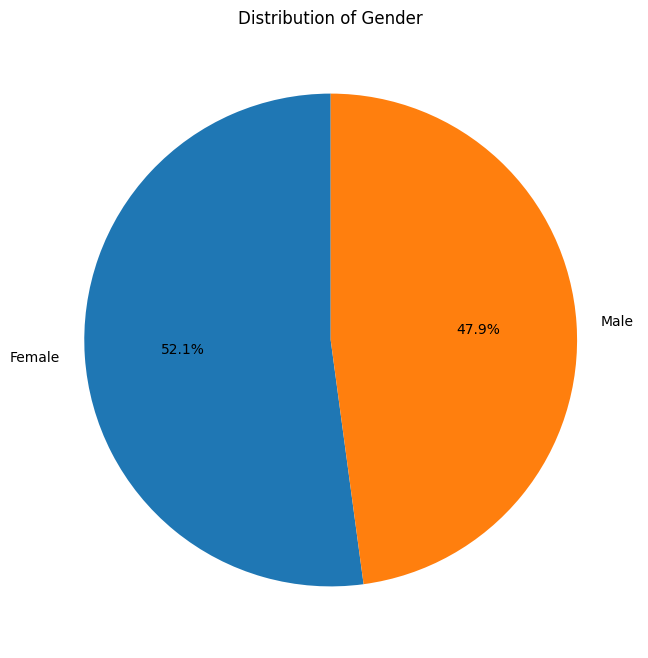

In [8]:
# Pie chart for the distribution of Gender in the filtered dataset
plt.figure(figsize=(8, 8))
df_clean['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Gender')
plt.ylabel('')  

plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_26484\2817265406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df_clean, palette='viridis')


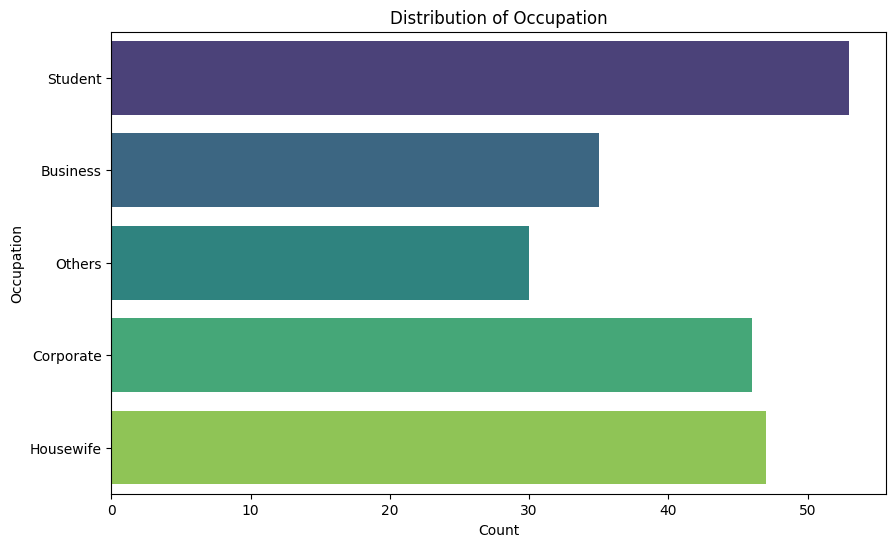

In [9]:
# Countplot for the distribution of Occupation in the filtered dataset
plt.figure(figsize=(10, 6))

sns.countplot(y='Occupation', data=df_clean, palette='viridis')
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_28336\1708989670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Growing_Stress', data=df_clean, palette='viridis')


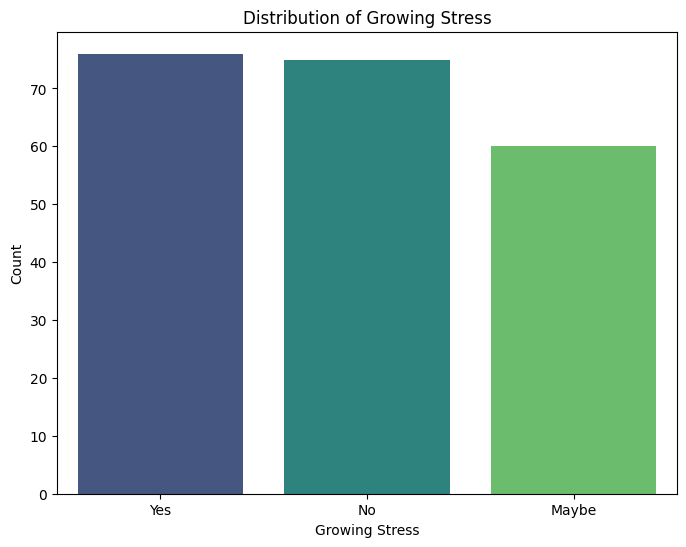

In [151]:
# Bar plot for the distribution of growing stress in the filtered dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Growing_Stress', data=df_clean, palette='viridis')
plt.title('Distribution of Growing Stress')
plt.xlabel('Growing Stress')
plt.ylabel('Count')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_26484\3819213168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weight_Change', data=df_clean, palette='viridis')


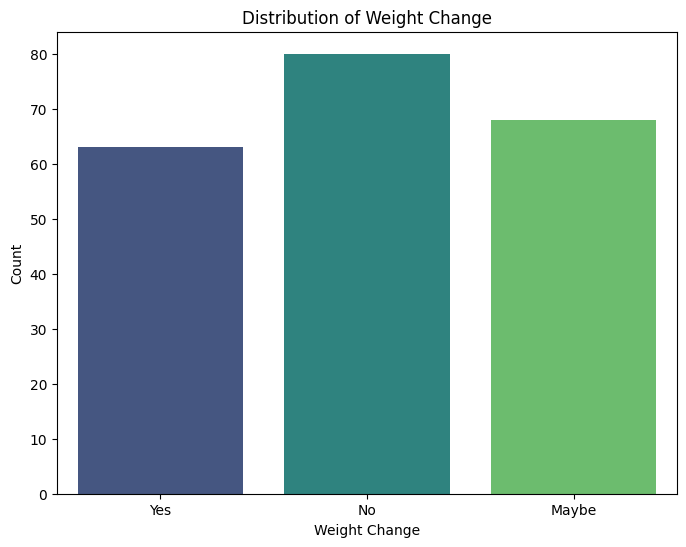

In [10]:
# Bar plot for the distribution of Weight Change in the filtered dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Weight_Change', data=df_clean, palette='viridis')

plt.title('Distribution of Weight Change')
plt.xlabel('Weight Change')
plt.ylabel('Count')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_26484\1114894200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Coping_Struggles', data=df_clean, palette='viridis')


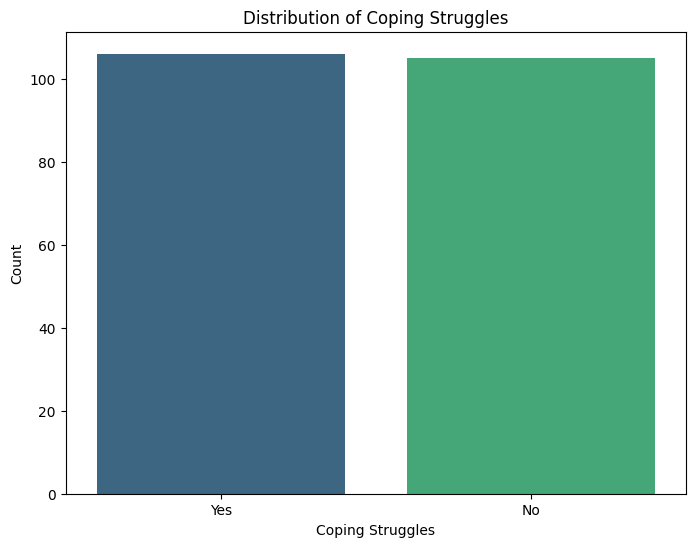

In [11]:
# Distribution of coping struggles
plt.figure(figsize=(8, 6))
sns.countplot(x='Coping_Struggles', data=df_clean, palette='viridis')
plt.title('Distribution of Coping Struggles')
plt.xlabel('Coping Struggles')
plt.ylabel('Count')
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_28336\2739093118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mood_Swings', data=df_clean, palette='viridis')


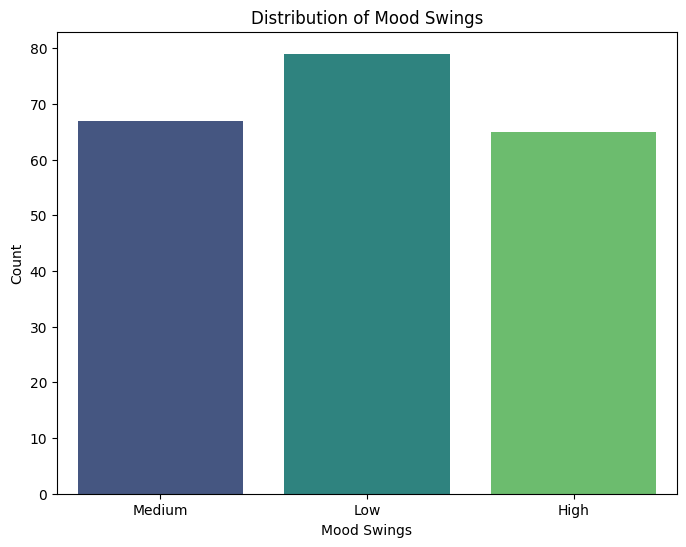

In [156]:
# Bar plot for distribution of mood swings
plt.figure(figsize=(8, 6))
sns.countplot(x='Mood_Swings', data=df_clean, palette='viridis')
plt.title('Distribution of Mood Swings')
plt.xlabel('Mood Swings')
plt.ylabel('Count')
plt.show()

In [ ]:
contingency_table = pd.crosstab(df_clean['Occupation'], df_clean['Growing_Stress'])

# Perform Chi-Square Test for occupation and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 9.030584184703814, p-value: 0.3397224857391915


In [ ]:
contingency_table = pd.crosstab(df_clean['Coping_Struggles'], df_clean['Mental_Health_History'])

# Perform Chi-Square Test for coping struggles and mental health history
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 2.1882738168745663, p-value: 0.3348284699004158


In [ ]:
contingency_table = pd.crosstab(df_clean['Mood_Swings'], df_clean['Growing_Stress'])

# Perform Chi-Square Test for mood swings and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 5.832953088297048, p-value: 0.21197559363001045


In [ ]:
contingency_table = pd.crosstab(df_clean['Mental_Health_History'], df_clean['Growing_Stress'])

# Perform Chi-Square Test for mental health history and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 3.3050940542391505, p-value: 0.5081255550081549


In [ ]:
contingency_table = pd.crosstab(df_clean['Weight_Change'], df_clean['Growing_Stress'])

# Perform Chi-Square Test for weight change and growing stress
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 6.49901308418104, p-value: 0.16485257758602945


In [12]:
contingency_table = pd.crosstab(df_clean['Coping_Struggles'], df_clean['Mood_Swings'])

# Perform Chi-Square Test for coping struggles and mood swings
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 6.314479941265338, p-value: 0.042542999115197065


In [13]:
# Followup analysis: Cramer's V for the association between coping struggles and mood swings
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.1729926160830774
